In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import datetime as dt
pd.set_option('display.max_columns',None)

In [2]:
test = pd.read_csv('test_raw.csv')
train_raw = pd.read_csv('train_raw.csv')

In [3]:
train_raw.sample(5)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
17954,2016-08-01,2623,42,Female,C9,Bachelor,68473,2015-07-07,2016-08-02,2,2,0,1
17221,2016-10-01,2541,31,Female,C27,College,68356,2013-04-27,NaN,1,4,991960,2
3086,2017-09-01,453,37,Male,C12,Master,123361,2016-07-15,NaN,4,4,2415460,2
16381,2016-06-01,2421,38,Male,C28,Bachelor,58275,2013-01-07,2016-06-11,1,1,0,1
7569,2016-06-01,1129,32,Male,C6,College,73087,2015-06-04,NaN,1,2,2561650,4


In [4]:
train_raw.head(2)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2


In [5]:
# MMM-YY, Salary, Total Business Value, Quarterly Rating

In [6]:
cols = ['Emp_ID','Age','Gender','City','Education_Level','Dateofjoining','LastWorkingDate','Joining Designation','Designation']

In [7]:
df2 = train_raw[cols]

In [8]:
df2 = df2.drop_duplicates('Emp_ID',keep='last').reset_index(drop=True)

In [9]:
df2.sample(5)

,Emp_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Designation
269,322,41,Female,C6,College,2016-06-15,2016-11-23,2,2
47,61,32,Male,C11,Master,2015-05-04,2016-03-17,1,1
1334,1571,23,Male,C16,Master,2016-09-28,2016-11-30,1,1
1074,1263,38,Male,C16,Bachelor,2016-12-12,NaN,2,2
2084,2443,26,Male,C25,College,2014-11-25,2016-09-22,1,2


In [10]:
df2.loc[df2['LastWorkingDate'].notnull(),'resigned'] = 1
df2.loc[df2['LastWorkingDate'].isnull(),'resigned'] = 0
df2['resigned'] = df2['resigned'].astype('int64')

In [11]:
df2['resigned'].value_counts(normalize=True)*100

1    67.870643
0    32.129357
Name: resigned, dtype: float64

In [12]:
date = ['Dateofjoining','LastWorkingDate']
for col in date:
    df2[col] = df2[col].astype('datetime64') 


In [13]:
df2.loc[df2['LastWorkingDate'].notnull(),'tenure'] = round((df2['LastWorkingDate'] - df2['Dateofjoining'])/np.timedelta64(1,'M'),2)

In [14]:
df2.loc[df2['LastWorkingDate'].isnull(),'tenure'] = round((pd.to_datetime('2017-12-31') - df2['Dateofjoining'])/np.timedelta64(1,'M'),2)

In [15]:
df2

,Emp_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Designation,resigned,tenure
0,1,28,Male,C23,Master,2015-12-24,2016-03-11,1,1,1,2.56
1,2,31,Male,C7,Master,2017-11-06,NaT,2,2,0,1.81
2,4,43,Male,C13,Master,2016-12-07,2017-04-27,2,2,1,4.63
3,5,29,Male,C9,College,2016-01-09,2016-03-07,1,1,1,1.91
4,6,31,Female,C11,Bachelor,2017-07-31,NaT,3,3,0,5.03
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,2012-10-15,NaT,2,3,0,62.52
2377,2785,34,Female,C9,College,2017-08-28,2017-10-28,1,1,1,2.00
2378,2786,45,Male,C19,College,2015-07-31,2016-09-22,2,2,1,13.77
2379,2787,28,Female,C20,Master,2015-07-21,2016-06-20,1,1,1,11.01


In [16]:
num_cols = train_raw.groupby('Emp_ID')[['Salary','Total Business Value','Quarterly Rating']].mean().reset_index()

In [17]:
num_cols = num_cols.astype('int64')

In [18]:
num_cols.rename(columns={'Quarterly Rating':'Ratings'},inplace=True)

In [19]:
num_cols

,Emp_ID,Salary,Total Business Value,Ratings
0,1,57387,571860,2
1,2,67016,0,1
2,4,65603,70000,1
3,5,46368,40120,1
4,6,78728,253000,1
...,...,...,...,...
2376,2784,82815,906200,2
2377,2785,12105,0,1
2378,2786,35370,312787,1
2379,2787,69498,162971,1


In [20]:
df2 = pd.merge(df2,num_cols,on='Emp_ID',how='left')

In [21]:
df2

,Emp_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Designation,resigned,tenure,Salary,Total Business Value,Ratings
0,1,28,Male,C23,Master,2015-12-24,2016-03-11,1,1,1,2.56,57387,571860,2
1,2,31,Male,C7,Master,2017-11-06,NaT,2,2,0,1.81,67016,0,1
2,4,43,Male,C13,Master,2016-12-07,2017-04-27,2,2,1,4.63,65603,70000,1
3,5,29,Male,C9,College,2016-01-09,2016-03-07,1,1,1,1.91,46368,40120,1
4,6,31,Female,C11,Bachelor,2017-07-31,NaT,3,3,0,5.03,78728,253000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,2012-10-15,NaT,2,3,0,62.52,82815,906200,2
2377,2785,34,Female,C9,College,2017-08-28,2017-10-28,1,1,1,2.00,12105,0,1
2378,2786,45,Male,C19,College,2015-07-31,2016-09-22,2,2,1,13.77,35370,312787,1
2379,2787,28,Female,C20,Master,2015-07-21,2016-06-20,1,1,1,11.01,69498,162971,1


In [22]:
hike = []
for emp in df2['Emp_ID']:
    filter = train_raw[train_raw['Emp_ID']==emp]
    if filter['Salary'].max()>filter['Salary'].min():
        hike.append('yes')
    else:
        hike.append('no')
        
hike = pd.DataFrame({
    'Emp_ID':df2['Emp_ID'],
    'salary_hike':hike
})
hike

,Emp_ID,salary_hike
0,1,no
1,2,no
2,4,no
3,5,no
4,6,no
...,...,...
2376,2784,no
2377,2785,no
2378,2786,no
2379,2787,no


In [23]:
hike['salary_hike'].value_counts()

no     2337
yes      44
Name: salary_hike, dtype: int64

In [24]:
df2 = pd.merge(df2,hike,on='Emp_ID',how='left')

In [25]:
df2['promotion'] = np.nan
df2.loc[df2['Designation']>df2['Joining Designation'],'promotion'] = 'yes'
df2['promotion'].fillna('no',inplace=True)

In [26]:
promotion_but_no_hike = df2[(df2['salary_hike']=='no') & (df2['promotion']=='yes')]

In [27]:
promotion_but_no_hike

,Emp_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Designation,resigned,tenure,Salary,Total Business Value,Ratings,salary_hike,promotion
8,13,31,Male,C19,Master,2012-05-28,2017-11-25,1,4,1,65.94,119227,444045,1,no,yes
16,24,31,Male,C24,Master,2015-05-25,2016-10-27,1,2,1,17.12,76308,410172,2,no,yes
17,25,31,Male,C24,Bachelor,2014-10-30,NaT,1,3,0,38.05,102077,1514629,3,no,yes
36,49,22,Male,C20,College,2015-05-25,2017-01-21,1,2,1,19.94,53039,138369,1,no,yes
43,57,38,Female,C1,Bachelor,2014-07-26,2017-07-21,1,2,1,35.84,84318,1199542,3,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2766,37,Female,C21,Bachelor,2010-11-05,2017-11-30,2,3,1,84.83,53793,1048504,2,no,yes
2364,2768,30,Female,C1,Master,2013-05-06,2016-05-30,1,2,1,36.80,80138,427655,1,no,yes
2366,2771,41,Male,C12,College,2012-08-29,NaT,2,4,0,64.07,91456,816542,2,no,yes
2367,2772,23,Female,C26,College,2014-06-12,2016-05-02,1,2,1,22.67,51670,356970,1,no,yes


In [28]:
df2.sample(5)

,Emp_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Designation,resigned,tenure,Salary,Total Business Value,Ratings,salary_hike,promotion
1869,2196,36,Male,C25,Bachelor,2010-10-06,NaT,2,4,0,86.84,116383,1177143,2,no,yes
1403,1647,26,Male,C3,Master,2015-09-03,2016-03-29,1,1,1,6.83,36114,162692,1,no,no
647,758,34,Male,C15,Bachelor,2016-08-31,2017-07-29,2,2,1,10.91,54288,310105,1,no,no
2237,2620,35,Female,C20,Bachelor,2016-01-08,2016-04-06,2,2,1,2.92,38829,0,1,no,no
1617,1897,33,Male,C16,Master,2016-04-07,2017-01-16,2,4,1,9.33,123750,659492,1,no,yes


In [29]:
#'City'
f_cols = ['Emp_ID', 'Age', 'Gender', 'Education_Level',
       'tenure', 'Salary', 'Total Business Value', 'Ratings', 'salary_hike',
       'promotion', 'resigned']

In [30]:
final = df2[f_cols]

In [31]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Emp_ID                2381 non-null   int64  
 1   Age                   2381 non-null   int64  
 2   Gender                2381 non-null   object 
 3   Education_Level       2381 non-null   object 
 4   tenure                2381 non-null   float64
 5   Salary                2381 non-null   int64  
 6   Total Business Value  2381 non-null   int64  
 7   Ratings               2381 non-null   int64  
 8   salary_hike           2381 non-null   object 
 9   promotion             2381 non-null   object 
 10  resigned              2381 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 223.2+ KB


In [32]:
nor_cols = ['Age','Salary','Total Business Value','tenure']

In [33]:
final = pd.get_dummies(final)

In [34]:
final

,Emp_ID,Age,tenure,Salary,Total Business Value,Ratings,resigned,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,salary_hike_no,salary_hike_yes,promotion_no,promotion_yes
0,1,28,2.56,57387,571860,2,1,0,1,0,0,1,1,0,1,0
1,2,31,1.81,67016,0,1,0,0,1,0,0,1,1,0,1,0
2,4,43,4.63,65603,70000,1,1,0,1,0,0,1,1,0,1,0
3,5,29,1.91,46368,40120,1,1,0,1,0,1,0,1,0,1,0
4,6,31,5.03,78728,253000,1,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,62.52,82815,906200,2,0,0,1,0,1,0,1,0,0,1
2377,2785,34,2.00,12105,0,1,1,1,0,0,1,0,1,0,1,0
2378,2786,45,13.77,35370,312787,1,1,0,1,0,1,0,1,0,1,0
2379,2787,28,11.01,69498,162971,1,1,1,0,0,0,1,1,0,1,0


In [35]:
x = final.drop('resigned',axis=1)
y = final['resigned']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

In [37]:
y_train.value_counts(normalize=True)*100

1    67.587035
0    32.412965
Name: resigned, dtype: float64

In [38]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [39]:
mm_df_train = pd.DataFrame(mm.fit_transform(x_train[nor_cols]),columns=nor_cols)

for col in nor_cols:
    x_train[col] = mm_df_train[col]

In [40]:
mm_df_test = pd.DataFrame(mm.fit_transform(x_test[nor_cols]),columns=nor_cols)

for col in nor_cols:
    x_test[col] = mm_df_test[col]

In [41]:
test = pd.merge(test,final,on='Emp_ID',how='left')

In [42]:
test

,Emp_ID,Age,tenure,Salary,Total Business Value,Ratings,resigned,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,salary_hike_no,salary_hike_yes,promotion_no,promotion_yes
0,394,34,78.85,97722,1144092,2,0,1,0,0,0,1,1,0,0,1
1,173,39,78.62,56174,827762,2,0,0,1,0,1,0,1,0,0,1
2,1090,39,78.16,96750,2099270,2,0,0,1,0,1,0,1,0,0,1
3,840,40,77.70,88813,713918,1,0,1,0,0,1,0,1,0,0,1
4,308,32,76.55,188418,2417687,2,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2134,40,86.05,116006,2487352,2,0,0,1,0,1,0,1,0,0,1
737,2255,40,85.82,133489,1516587,2,0,0,1,0,1,0,1,0,0,1
738,448,37,80.92,65389,1263282,2,0,0,1,1,0,0,1,0,0,1
739,1644,48,80.13,105513,1201781,2,0,1,0,1,0,0,1,0,0,1


In [43]:
mm_df_test1 = pd.DataFrame(mm.fit_transform(test[nor_cols]),columns=nor_cols)

for col in nor_cols:
    test[col] = mm_df_test1[col]

In [44]:
test

,Emp_ID,Age,tenure,Salary,Total Business Value,Ratings,resigned,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,salary_hike_no,salary_hike_yes,promotion_no,promotion_yes
0,394,0.363636,0.847594,0.483155,0.288030,2,0,1,0,0,0,1,1,0,0,1
1,173,0.515152,0.845119,0.246387,0.208393,2,0,0,1,0,1,0,1,0,0,1
2,1090,0.515152,0.840168,0.477616,0.528500,2,0,0,1,0,1,0,1,0,0,1
3,840,0.545455,0.835217,0.432385,0.179732,1,0,1,0,0,1,0,1,0,0,1
4,308,0.303030,0.822839,1.000000,0.608663,2,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2134,0.545455,0.925089,0.587349,0.626202,2,0,0,1,0,1,0,1,0,0,1
737,2255,0.545455,0.922613,0.686979,0.381807,2,0,0,1,0,1,0,1,0,0,1
738,448,0.454545,0.869874,0.298900,0.318037,2,0,0,1,1,0,0,1,0,0,1
739,1644,0.787879,0.861371,0.527553,0.302554,2,0,1,0,1,0,0,1,0,0,1


In [45]:
## Defining a funtion for model building
def model(model,x_train,x_test,y_train,y_test):
    import warnings
    warnings.filterwarnings('ignore')
    
    train = model.fit(x_train.iloc[:,1:],y_train)
    train_predict = model.predict(x_train.iloc[:,1:])
    a = print('Train data')
    b = print(classification_report(y_train,train_predict))
    c = plot_confusion_matrix(model,x_train.iloc[:,1:],y_train)
    plt.grid(False)
    
    test_predict = model.predict(x_test.iloc[:,1:])
    d = print('Test data')
    e = print(classification_report(y_test,test_predict))
    f = plot_confusion_matrix(model,x_test.iloc[:,1:],y_test)
    plt.grid(False)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

Train data
              precision    recall  f1-score   support

           0       0.71      0.37      0.48       540
           1       0.75      0.93      0.83      1126

    accuracy                           0.75      1666
   macro avg       0.73      0.65      0.66      1666
weighted avg       0.74      0.75      0.72      1666

Test data
              precision    recall  f1-score   support

           0       0.63      0.36      0.46       225
           1       0.75      0.90      0.82       490

    accuracy                           0.73       715
   macro avg       0.69      0.63      0.64       715
weighted avg       0.71      0.73      0.71       715



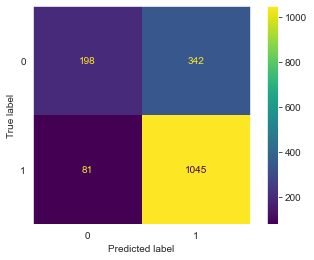

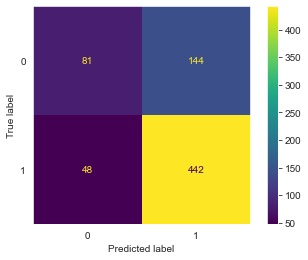

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model(lr,x_train,x_test,y_train,y_test)

In [50]:
test.drop('resigned',axis=1,inplace=True)

In [51]:
test

,Emp_ID,Age,tenure,Salary,Total Business Value,Ratings,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,salary_hike_no,salary_hike_yes,promotion_no,promotion_yes
0,394,0.363636,0.847594,0.483155,0.288030,2,1,0,0,0,1,1,0,0,1
1,173,0.515152,0.845119,0.246387,0.208393,2,0,1,0,1,0,1,0,0,1
2,1090,0.515152,0.840168,0.477616,0.528500,2,0,1,0,1,0,1,0,0,1
3,840,0.545455,0.835217,0.432385,0.179732,1,1,0,0,1,0,1,0,0,1
4,308,0.303030,0.822839,1.000000,0.608663,2,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2134,0.545455,0.925089,0.587349,0.626202,2,0,1,0,1,0,1,0,0,1
737,2255,0.545455,0.922613,0.686979,0.381807,2,0,1,0,1,0,1,0,0,1
738,448,0.454545,0.869874,0.298900,0.318037,2,0,1,1,0,0,1,0,0,1
739,1644,0.787879,0.861371,0.527553,0.302554,2,1,0,1,0,0,1,0,0,1


In [62]:
model_lr = lr.fit(x_train,y_train)
test_predict = model_lr.predict(test)
Logistic_regression = pd.DataFrame({
    'Emp_ID': test['Emp_ID'],
    'predict':test_predict
})
Logistic_regression.to_csv('Logistic_regression.csv')

In [66]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
model_svc = svc.fit(x_train,y_train)
test_predict = model_svc.predict(test)
Support_vector_classifier = pd.DataFrame({
    'Emp_ID': test['Emp_ID'],
    'predict':test_predict
})
Support_vector_classifier.to_csv('Support_vector_classifier.csv')

Train data
              precision    recall  f1-score   support

           0       0.70      0.38      0.49       540
           1       0.76      0.92      0.83      1126

    accuracy                           0.74      1666
   macro avg       0.73      0.65      0.66      1666
weighted avg       0.74      0.74      0.72      1666

Test data
              precision    recall  f1-score   support

           0       0.65      0.34      0.45       225
           1       0.75      0.92      0.83       490

    accuracy                           0.74       715
   macro avg       0.70      0.63      0.64       715
weighted avg       0.72      0.74      0.71       715



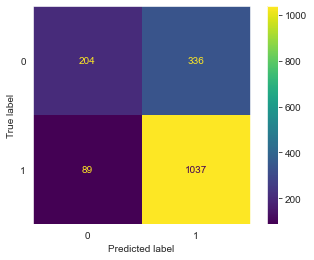

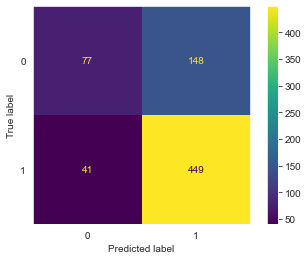

In [67]:
model(svc,x_train,x_test,y_train,y_test)